<a href="https://colab.research.google.com/github/rezamohammadloo/imdb-review/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_datasets as tfds
import numpy
import tensorflow

In [ ]:
imdb , info = tfds.load('imdb_reviews', with_info = True, as_supervised= True)

In [ ]:
training_data , testing_data = imdb['train'], imdb['test']

In [ ]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in training_data:
  training_sentences.append(str(s.numpy))
  training_labels.append(l.numpy())


for s,l in testing_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [ ]:
training_labels_final = numpy.array(training_labels)
testing_labels_final = numpy.array(testing_labels)

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<oov>'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length,truncating = trunc_type )

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),#we can use GlobalAveragePooling1D() insted
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 160109 (625.43 KB)
Trainable params: 160109 (625.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(padded,
          training_labels_final,
          epochs = num_epochs,
          validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 7s 7ms/step - loss: 0.5777 - accuracy: 0.7429 - val_loss: 0.4137 - val_accuracy: 0.8298
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.3596 - accuracy: 0.8527 - val_loss: 0.3403 - val_accuracy: 0.8524
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2924 - accuracy: 0.8822 - val_loss: 0.3323 - val_accuracy: 0.8563
Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2560 - accuracy: 0.8996 - val_loss: 0.3411 - val_accuracy: 0.8535
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2295 - accuracy: 0.9126 - val_loss: 0.3581 - val_accuracy: 0.8468
Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2078 - accuracy: 0.9220 - val_loss: 0.3845 - val_accuracy: 0.8393
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.1911 - accuracy: 0.9297 - val_loss: 0.4076 - val_accuracy: 0.8360
Epoch 

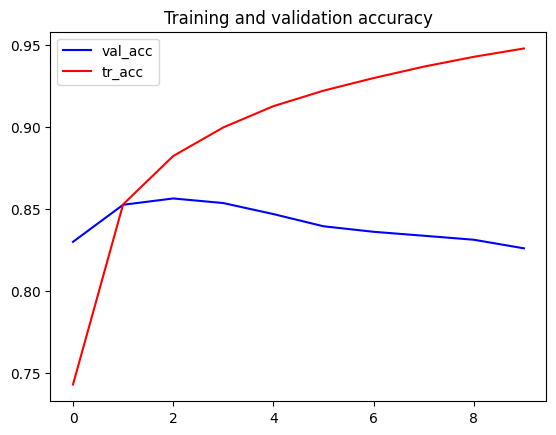

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

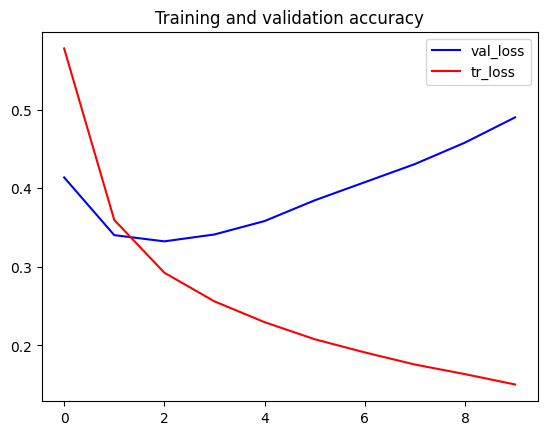

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

accuracy=history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss=history.history['val_loss']

epochs=range(len(loss))


plt.plot(epochs, val_accuracy, 'b', label='val_acc')
plt.plot(epochs, accuracy, 'r', label='tr_acc')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.plot(epochs, loss, 'r', label='tr_loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()